In-Class 11/1

In [137]:
!pip install palmerpenguins

In [138]:
from palmerpenguins import load_penguins
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

In [139]:
penguins = load_penguins()
penguins = penguins.dropna()
X = penguins.drop('bill_depth_mm', axis = 1)
y = penguins['bill_depth_mm']

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [140]:
## Preprocessing: One-Hot-Encode
## Model Spec: Linear Regression

lr = LinearRegression()
enc = OneHotEncoder()


ct = ColumnTransformer(
    [('dummify_s', enc, ['species']),
     ('dummify_i', enc, ['island']),
     ('dummify_sex', enc, ['sex'])],
)

my_pipeline = Pipeline(
  [('dummify_everything' , ct), ('ols', lr)]
)

In [141]:
fitted_simple_pipeline = my_pipeline.fit(X_train, y_train)
y_preds = fitted_simple_pipeline.predict(X_test)

In [142]:
y_preds

array([17.46875, 17.46875, 19.375  , 15.65625, 17.5625 , 19.     ,
       17.84375, 17.6875 , 19.1875 , 15.65625, 17.84375, 17.6875 ,
       19.0625 , 15.65625, 19.     , 17.84375, 19.375  , 19.375  ,
       19.     , 19.375  , 14.125  , 19.     , 17.46875, 15.65625,
       19.1875 , 14.125  , 19.375  , 19.375  , 15.65625, 17.6875 ,
       19.0625 , 19.375  , 14.125  , 19.     , 19.     , 15.65625,
       17.6875 , 17.5625 , 19.     , 19.375  , 17.5625 , 17.6875 ,
       19.375  , 17.84375, 17.6875 , 19.     , 19.0625 , 17.5625 ,
       14.125  , 15.65625, 14.125  , 17.84375, 14.125  , 17.5625 ,
       19.375  , 19.0625 , 17.46875, 17.46875, 19.375  , 17.6875 ,
       15.65625, 19.1875 , 19.1875 , 19.375  , 14.125  , 15.65625,
       15.65625, 15.65625, 19.1875 , 14.125  , 17.46875, 15.65625,
       19.     , 19.     , 17.5625 , 19.1875 , 19.1875 , 19.375  ,
       15.65625, 19.0625 , 15.65625, 14.125  , 14.125  , 14.125  ])

In [143]:
RSS = round(np.sum((y_test - y_preds) ** 2), 2)

In [144]:
RSS

53.05

# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [145]:
penguins = load_penguins()
penguins = penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


Model 1: Including species, island, bill_length_mm, flipper_length_mm, body_mass_g, sex, year

In [146]:
X = penguins.drop('bill_depth_mm', axis = 1)
y = penguins['bill_depth_mm']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 3)

In [147]:
## Preprocessing: One-Hot-Encode, Polynomial
## Model Spec: Linear Regression

lr = LinearRegression()
enc = OneHotEncoder()
poly = PolynomialFeatures(3)

ct = ColumnTransformer(
    [('dummify_s', enc, ['species']),
     ('dummify_i', enc, ['island']),
     ('dummify_sex', enc, ['sex']),
     ('cube_bill_length', poly, ['bill_length_mm']),
     ('cube_flipper_length', poly, ['flipper_length_mm']),
     ('cube_body_mass', poly, ['body_mass_g'])],
)

my_pipeline = Pipeline(
  [('dummify_and_poly' , ct), ('ols', lr)]
)

In [148]:
fitted_pipeline = my_pipeline.fit(X_train, y_train)

In [149]:
y_preds_test = fitted_pipeline.predict(X_test)
y_preds_train = fitted_pipeline.predict(X_train)

In [150]:
mse_test_model_1 = mean_squared_error(y_test, y_preds_test)
mse_train_model_1 = mean_squared_error(y_train, y_preds_train)
r_sq_test_model_1 = r2_score(y_test, y_preds_test)
r_sq_train_model_1 = r2_score(y_train, y_preds_train)
num_variables_model_1 = 18

Model 2: Including island, bill_length_mm, flipper_length_mm, body_mass_g, sex, year

In [151]:
X = penguins.drop(['bill_depth_mm', 'species'], axis = 1)
y = penguins['bill_depth_mm']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 3)

In [152]:
## Preprocessing: One-Hot-Encode
## Model Spec: Linear Regression

lr = LinearRegression()
enc = OneHotEncoder()


ct = ColumnTransformer(
    [('dummify_i', enc, ['island']),
     ('dummify_sex', enc, ['sex'])],
)

my_pipeline = Pipeline(
  [('dummify_everything' , ct), ('ols', lr)]
)

In [153]:
fitted_pipeline = my_pipeline.fit(X_train, y_train)

In [154]:
y_preds_test = fitted_pipeline.predict(X_test)
y_preds_train = fitted_pipeline.predict(X_train)

In [155]:
mse_test_model_2 = mean_squared_error(y_test, y_preds_test)
mse_train_model_2 = mean_squared_error(y_train, y_preds_train)
r_sq_test_model_2 = r2_score(y_test, y_preds_test)
r_sq_train_model_2 = r2_score(y_train, y_preds_train)
num_variables_model_2 = 9

Model 3: Including species, bill_length_mm, flipper_length_mm, body_mass_g, sex, year

In [156]:
X = penguins.drop(['bill_depth_mm', 'island'], axis = 1)
y = penguins['bill_depth_mm']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 3)

In [157]:
## Preprocessing: One-Hot-Encode
## Model Spec: Linear Regression

lr = LinearRegression()
enc = OneHotEncoder()
poly = PolynomialFeatures(2)


ct = ColumnTransformer(
    [('dummify_i', enc, ['species']),
     ('dummify_sex', enc, ['sex']),
     ('quad_bill_length', poly, ['bill_length_mm'])]
)

my_pipeline = Pipeline(
  [('dummify_everything' , ct), ('ols', lr)]
)

In [158]:
fitted_pipeline = my_pipeline.fit(X_train, y_train)

In [159]:
y_preds_test = fitted_pipeline.predict(X_test)
y_preds_train = fitted_pipeline.predict(X_train)

In [160]:
mse_test_model_3 = mean_squared_error(y_test, y_preds_test)
mse_train_model_3 = mean_squared_error(y_train, y_preds_train)
r_sq_test_model_3 = r2_score(y_test, y_preds_test)
r_sq_train_model_3 = r2_score(y_train, y_preds_train)
num_variables_model_3 = 10

Model 4: Including species, island, flipper_length_mm, body_mass_g, sex, year

In [161]:
X = penguins.drop(['bill_depth_mm', 'bill_length_mm'], axis = 1)
y = penguins['bill_depth_mm']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 3)

In [162]:
## Preprocessing: One-Hot-Encode
## Model Spec: Linear Regression

lr = LinearRegression()
enc = OneHotEncoder()


ct = ColumnTransformer(
    [('dummify_s', enc, ['species']),
     ('dummify_i', enc, ['island']),
     ('dummify_sex', enc, ['sex'])],
)

my_pipeline = Pipeline(
  [('dummify_everything' , ct), ('ols', lr)]
)

In [163]:
fitted_pipeline = my_pipeline.fit(X_train, y_train)

In [164]:
y_preds_test = fitted_pipeline.predict(X_test)
y_preds_train = fitted_pipeline.predict(X_train)

In [165]:
mse_test_model_4 = mean_squared_error(y_test, y_preds_test)
mse_train_model_4 = mean_squared_error(y_train, y_preds_train)
r_sq_test_model_4 = r2_score(y_test, y_preds_test)
r_sq_train_model_4 = r2_score(y_train, y_preds_train)
num_variables_model_4 = 11

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [166]:
data = [[num_variables_model_1, r_sq_train_model_1, r_sq_test_model_1, mse_train_model_1, mse_test_model_1], [num_variables_model_2, r_sq_train_model_2, r_sq_test_model_2, mse_train_model_2, mse_test_model_2], [num_variables_model_3, r_sq_train_model_3, r_sq_test_model_3, mse_train_model_3, mse_test_model_3], [num_variables_model_4, r_sq_train_model_4, r_sq_test_model_4, mse_train_model_4, mse_test_model_4]]

In [167]:
df = pd.DataFrame(data, columns = ['Flexibility', 'R2_Train', 'R2_Test', 'MSE_Train', 'MSE_Test'])
df

,Flexibility,R2_Train,R2_Test,MSE_Train,MSE_Test
0,18,0.850918,0.818549,0.570647,0.713154
1,9,0.551431,0.472326,1.717011,2.073909
2,10,0.825799,0.840452,0.666798,0.627071
3,11,0.822484,0.800550,0.679487,0.783897


In [168]:
long_df = df.melt(id_vars = ['Flexibility'], var_name = 'Type', value_name = 'Error_Measurement')
long_df

,Flexibility,Type,Error_Measurement
0,18,R2_Train,0.850918
1,9,R2_Train,0.551431
2,10,R2_Train,0.825799
3,11,R2_Train,0.822484
4,18,R2_Test,0.818549
5,9,R2_Test,0.472326
6,10,R2_Test,0.840452
7,11,R2_Test,0.800550
8,18,MSE_Train,0.570647
9,9,MSE_Train,1.717011


## R2

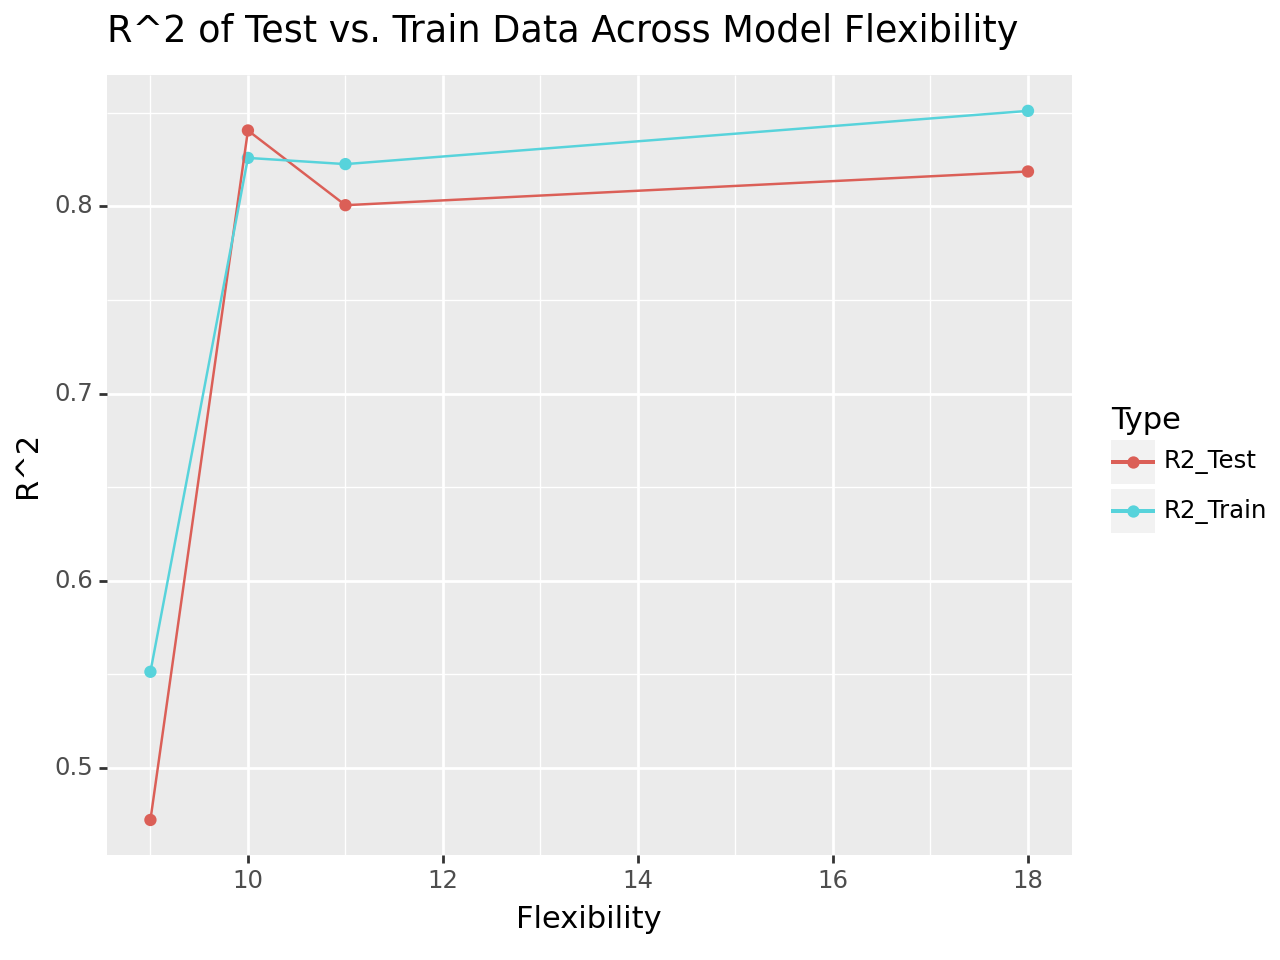

<Figure Size: (640 x 480)>

In [174]:
from plotnine import ggplot, aes, geom_point, geom_line, labs

(ggplot(long_df[(long_df['Type'] == 'R2_Train') | (long_df['Type'] =='R2_Test')])
+ geom_point(aes(
    x = 'Flexibility',
    y = 'Error_Measurement',
    color = 'Type'
    ))
+ geom_line(aes(
    x = 'Flexibility',
    y = 'Error_Measurement',
    color = 'Type',
    group = 'Type'
))
+ labs(title = "R^2 of Test vs. Train Data Across Model Flexibility", y = "R^2"))

## MSE

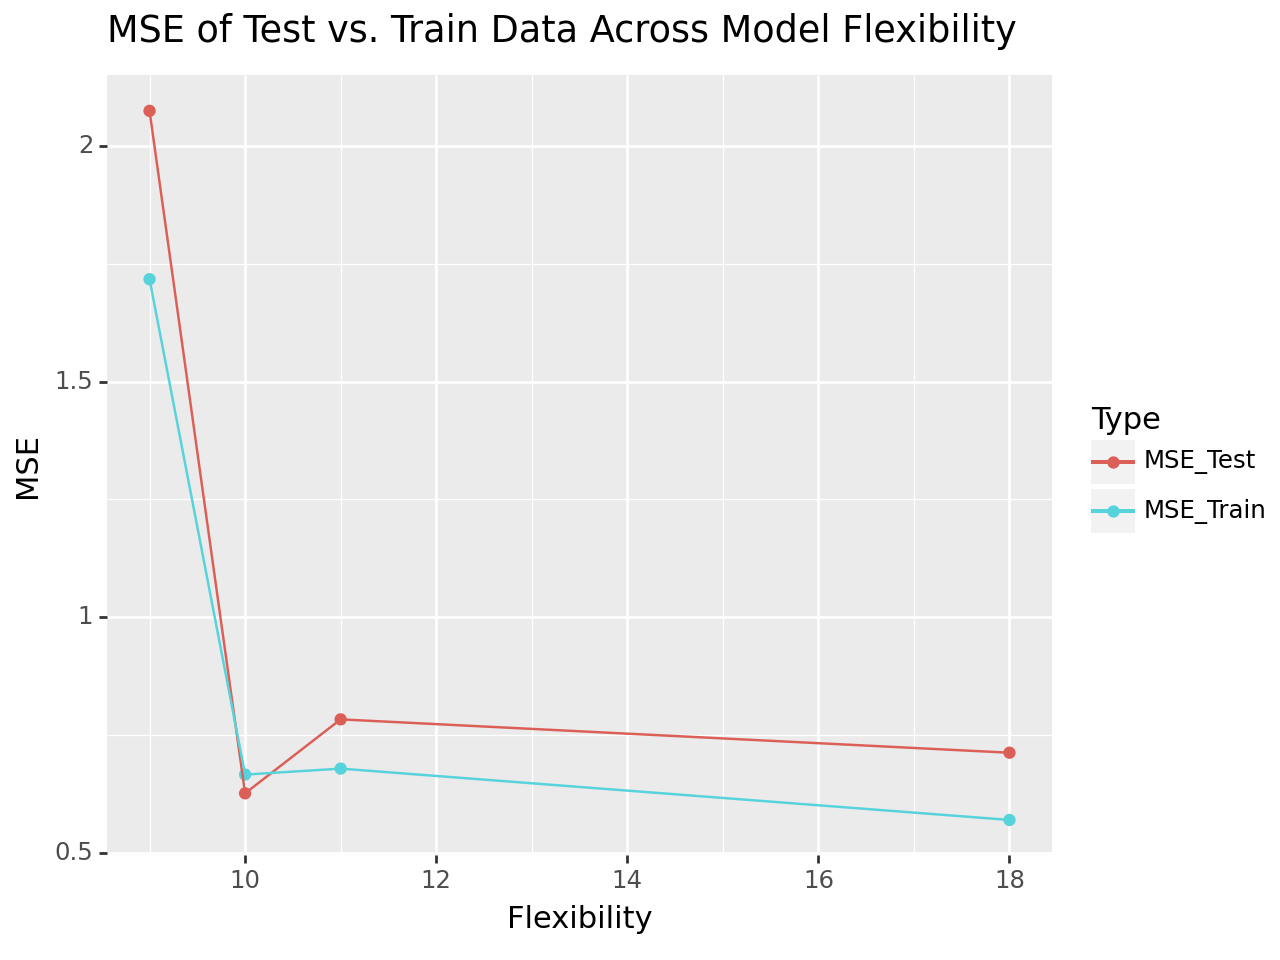

<Figure Size: (640 x 480)>

In [175]:
(ggplot(long_df[(long_df['Type'] == 'MSE_Train') | (long_df['Type'] =='MSE_Test')])
+ geom_point(aes(
    x = 'Flexibility',
    y = 'Error_Measurement',
    color = 'Type'
    ))
+ geom_line(aes(
    x = 'Flexibility',
    y = 'Error_Measurement',
    color = 'Type',
    group = 'Type'
    ))
+ labs(title = "MSE of Test vs. Train Data Across Model Flexibility", y = "MSE")
 )

In my opinon, the best model was Model 3 because it had the highest R^2 and lowest MLE while not overfitting the data like Model 1. While Model 1 did technically have higher R^2 and lower MSE, this is likely due to overfitting the model on the data, meaning the model would not be useful on other sets of data.